In [7]:


# In a Jupyter Notebook cell
import logging
from brancharchitect.io import read_newick, parse_newick
from brancharchitect.plot.tree_plot import plot_circular_trees_in_a_row
from brancharchitect.leaforder.benchmark_utilities import profile_and_visualize
from brancharchitect.leaforder.tree_order_optimisation_local import (
    smooth_order_of_trees_classic, 
    optimize_s_edge_splits, 
    optimize_unique_splits, 
)
from brancharchitect.leaforder.tree_order_optimisation_global import (
    collect_distances_for_trajectory
)

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [10]:
# [0.0, 0.0, 0.0, 0.2857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
# [0.0, 0.0, 0.19, 0.095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]+
#  0-1  1-2  2-3   3-4    4-5  5-6  6-7  7-8  8-9  9-10 10-11
# Step 1: Read original trees
# Update file path as needed
original_trees = read_newick("./../data/five_taxa_all_permutations.newick")
# Extract all taxa
method1_trees = [tree.deep_copy() for tree in original_trees]
method1_distances, pairs = collect_distances_for_trajectory(method1_trees)
plot_circular_trees_in_a_row(
    method1_trees,
    size=250,  # each tree gets a 300x300 bounding box
    margin=20,
    label_offset=3,
    ignore_branch_lengths=False,
)


method2_trees = [tree.deep_copy() for tree in original_trees]

smooth_order_of_trees_classic(
    method2_trees,
    [optimize_unique_splits, optimize_s_edge_splits],
    backward=True,
)

for tree in method2_trees:
    tree.midpoint_root()

method2_distances, _ = collect_distances_for_trajectory(method2_trees)
plot_circular_trees_in_a_row(
    method2_trees,
    size=250,  # each tree gets a 300x300 bounding box
    margin=20,
    label_offset=3,
    ignore_branch_lengths=False,
)

"""
for i in range(len(method2_trees) - 1):
    
    print(f"Optimizing trees {i} and {i + 1}...")
    
    improve_single_pair(
        tree1=method2_trees[i],
        tree2=method2_trees[i + 1],
        rotation_functions=[optimize_unique_splits, optimize_s_edge_splits],
    )

    improve_single_pair(
        tree1=method2_trees[i + 1],
        tree2=method2_trees[i],
        rotation_functions=[optimize_unique_splits, optimize_s_edge_splits],
    )
    
for i in range(1, len(method2_trees) - 1, -1):
    
    improve_single_pair(
        tree1=method2_trees[i-1], 
        tree2=method2_trees[i], 
        rotation_functions=[optimize_common_splits, optimize_s_edge_splits]
    ) 
"""

AttributeError: 'tuple' object has no attribute 'copy'

In [ ]:

file_path = "./../data/five_taxa_all_permutations.newick"

# Read trees
original_trees = read_newick(file_path)

midpoint_rooted_trees = []
original_trees = [original_trees[1]]
for tree in original_trees:
    new_tree = tree.midpoint_root()
    print("Before:", tree.get_current_order())
    print("After:", new_tree.get_current_order())
    print(new_tree.to_newick())
    midpoint_rooted_trees.append(new_tree)


test_trees = parse_newick("((A:3,B:1):2,(C:1,D:1):1);")
print(test_trees.to_newick())
mid_point = test_trees.midpoint_root()
print(mid_point.to_newick())

test_trees = parse_newick("((A:3,B:1):2,((C:1,D:1),(E:1,F:6)):1);")
print(test_trees.to_newick())
mid_point = test_trees.midpoint_root()
print(mid_point.to_newick())

original_trees = midpoint_rooted_trees



profile_and_visualize(
    filepath=file_path,
    optimize_both_sides=False,
    backward=True,
    iterations=20,
    midpoint_rooted=False,
)

AttributeError: 'tuple' object has no attribute 'copy'

INFO:root:Starting profiling...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


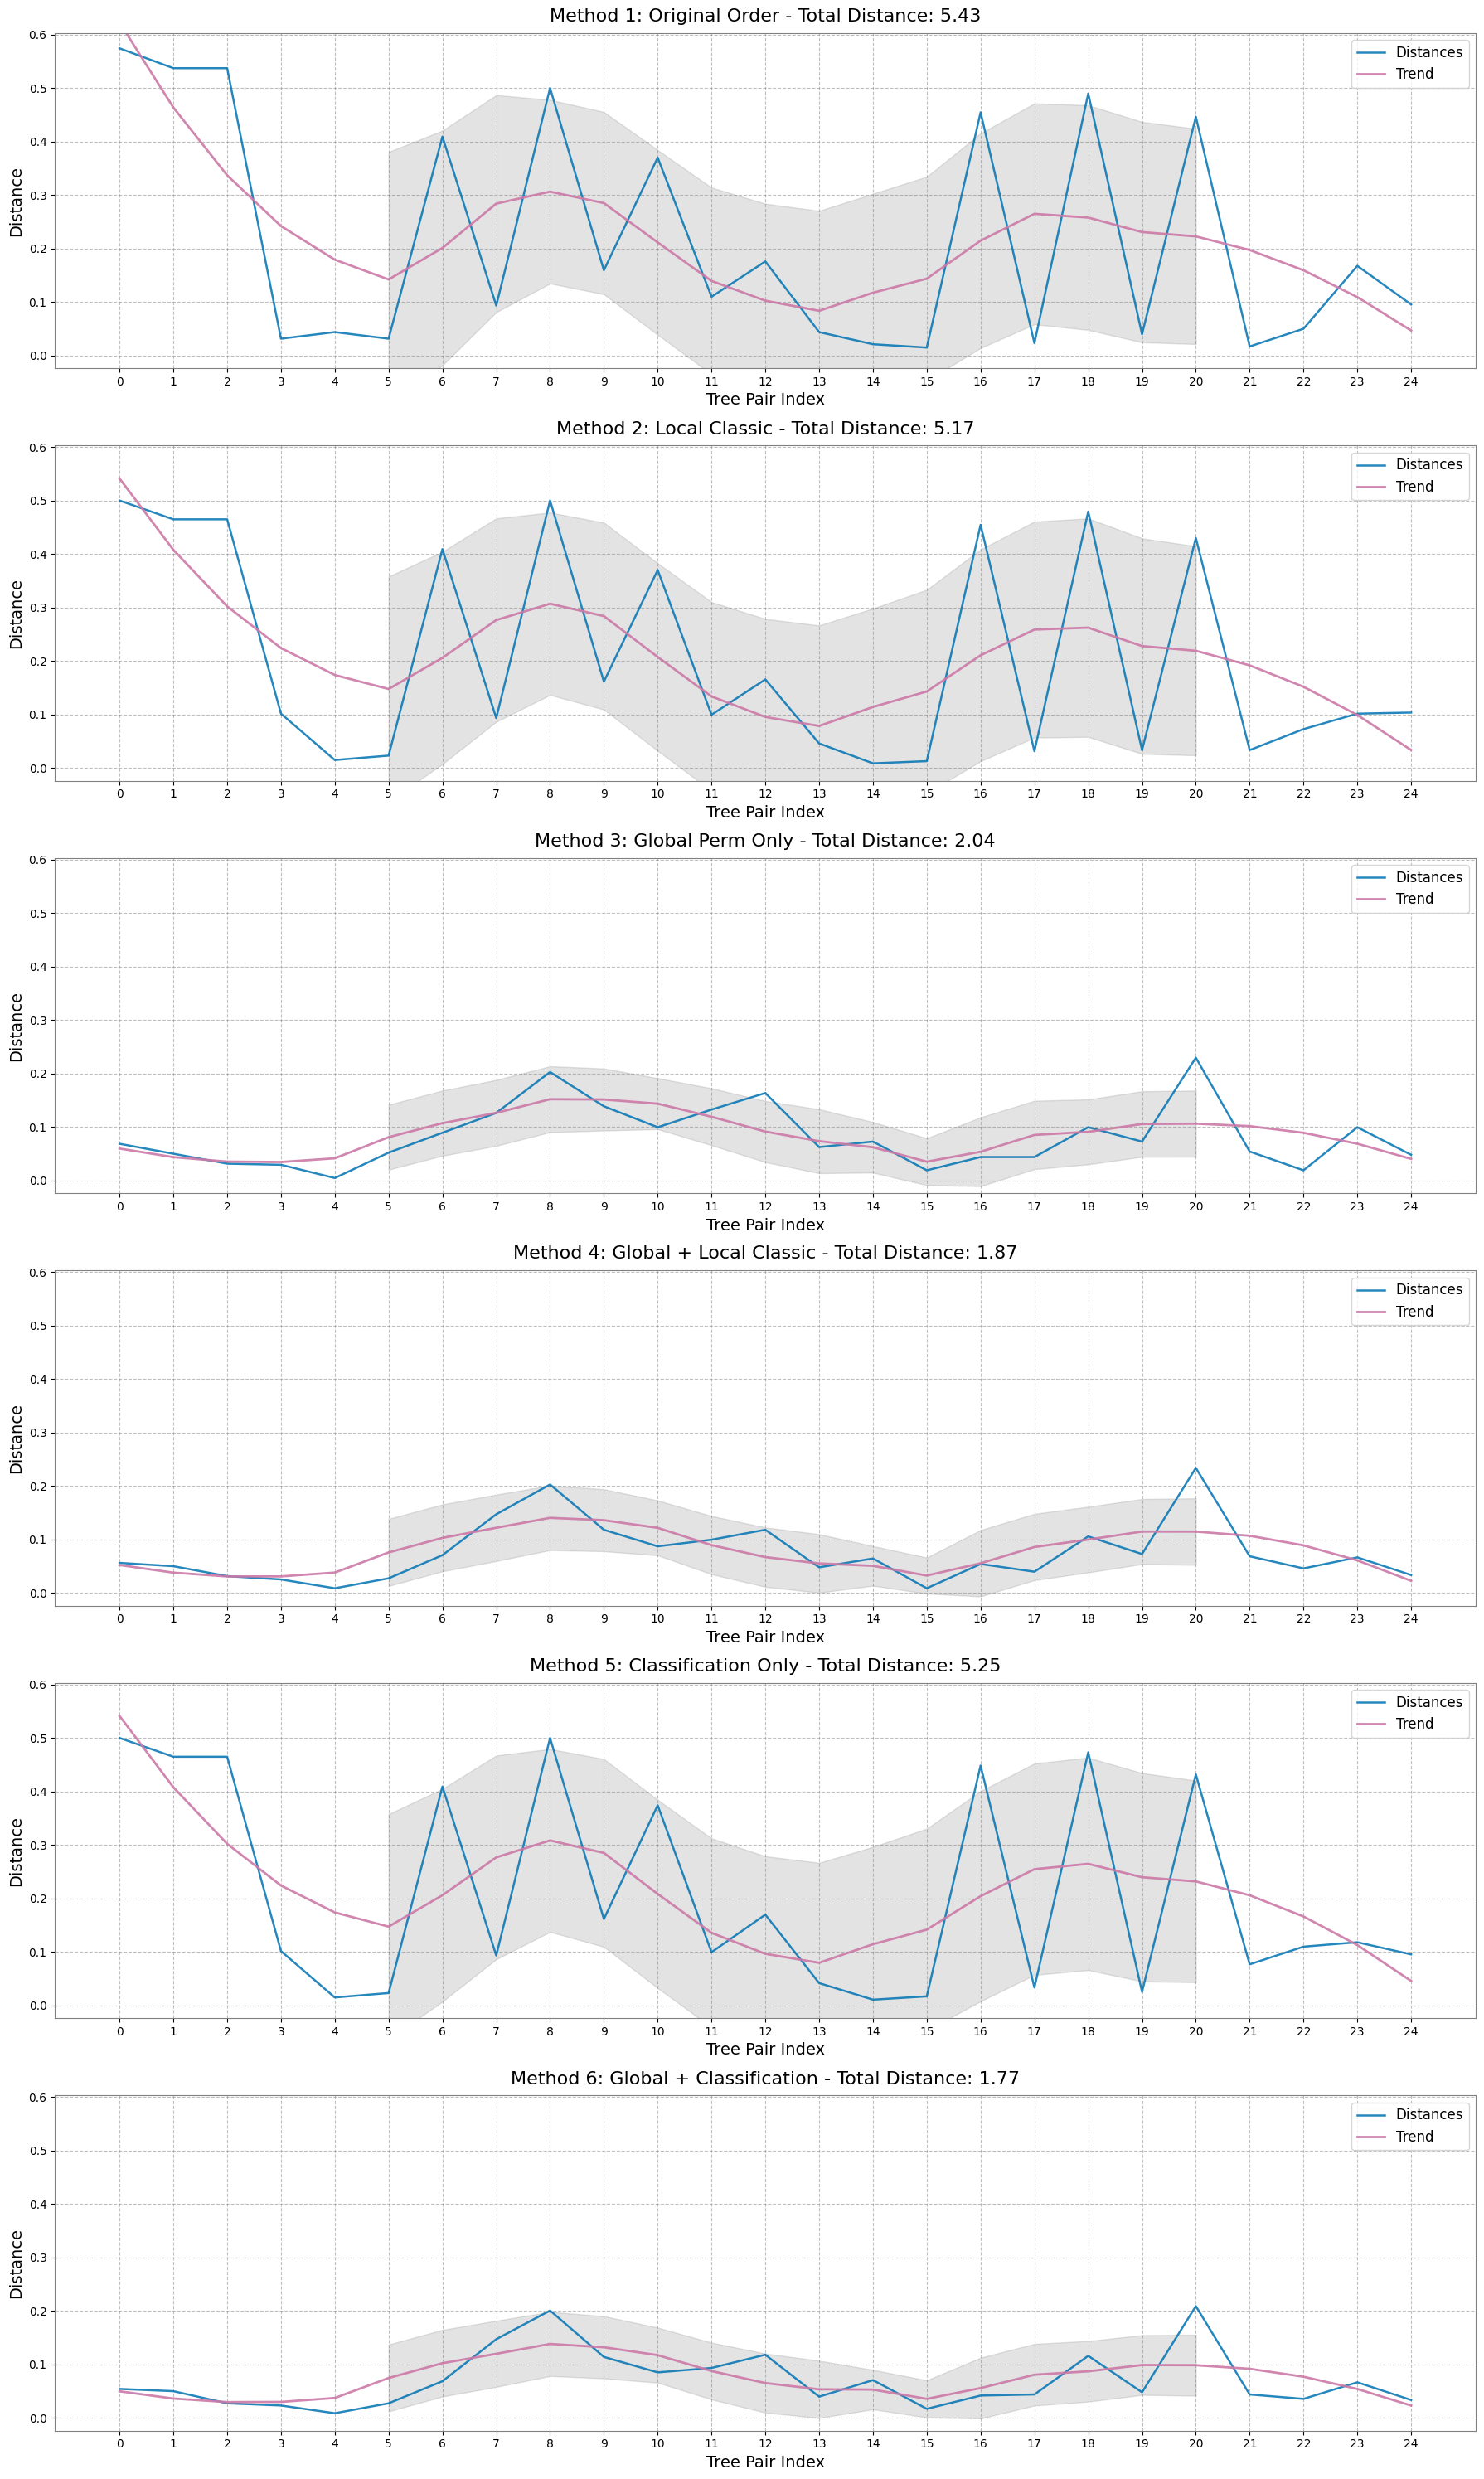

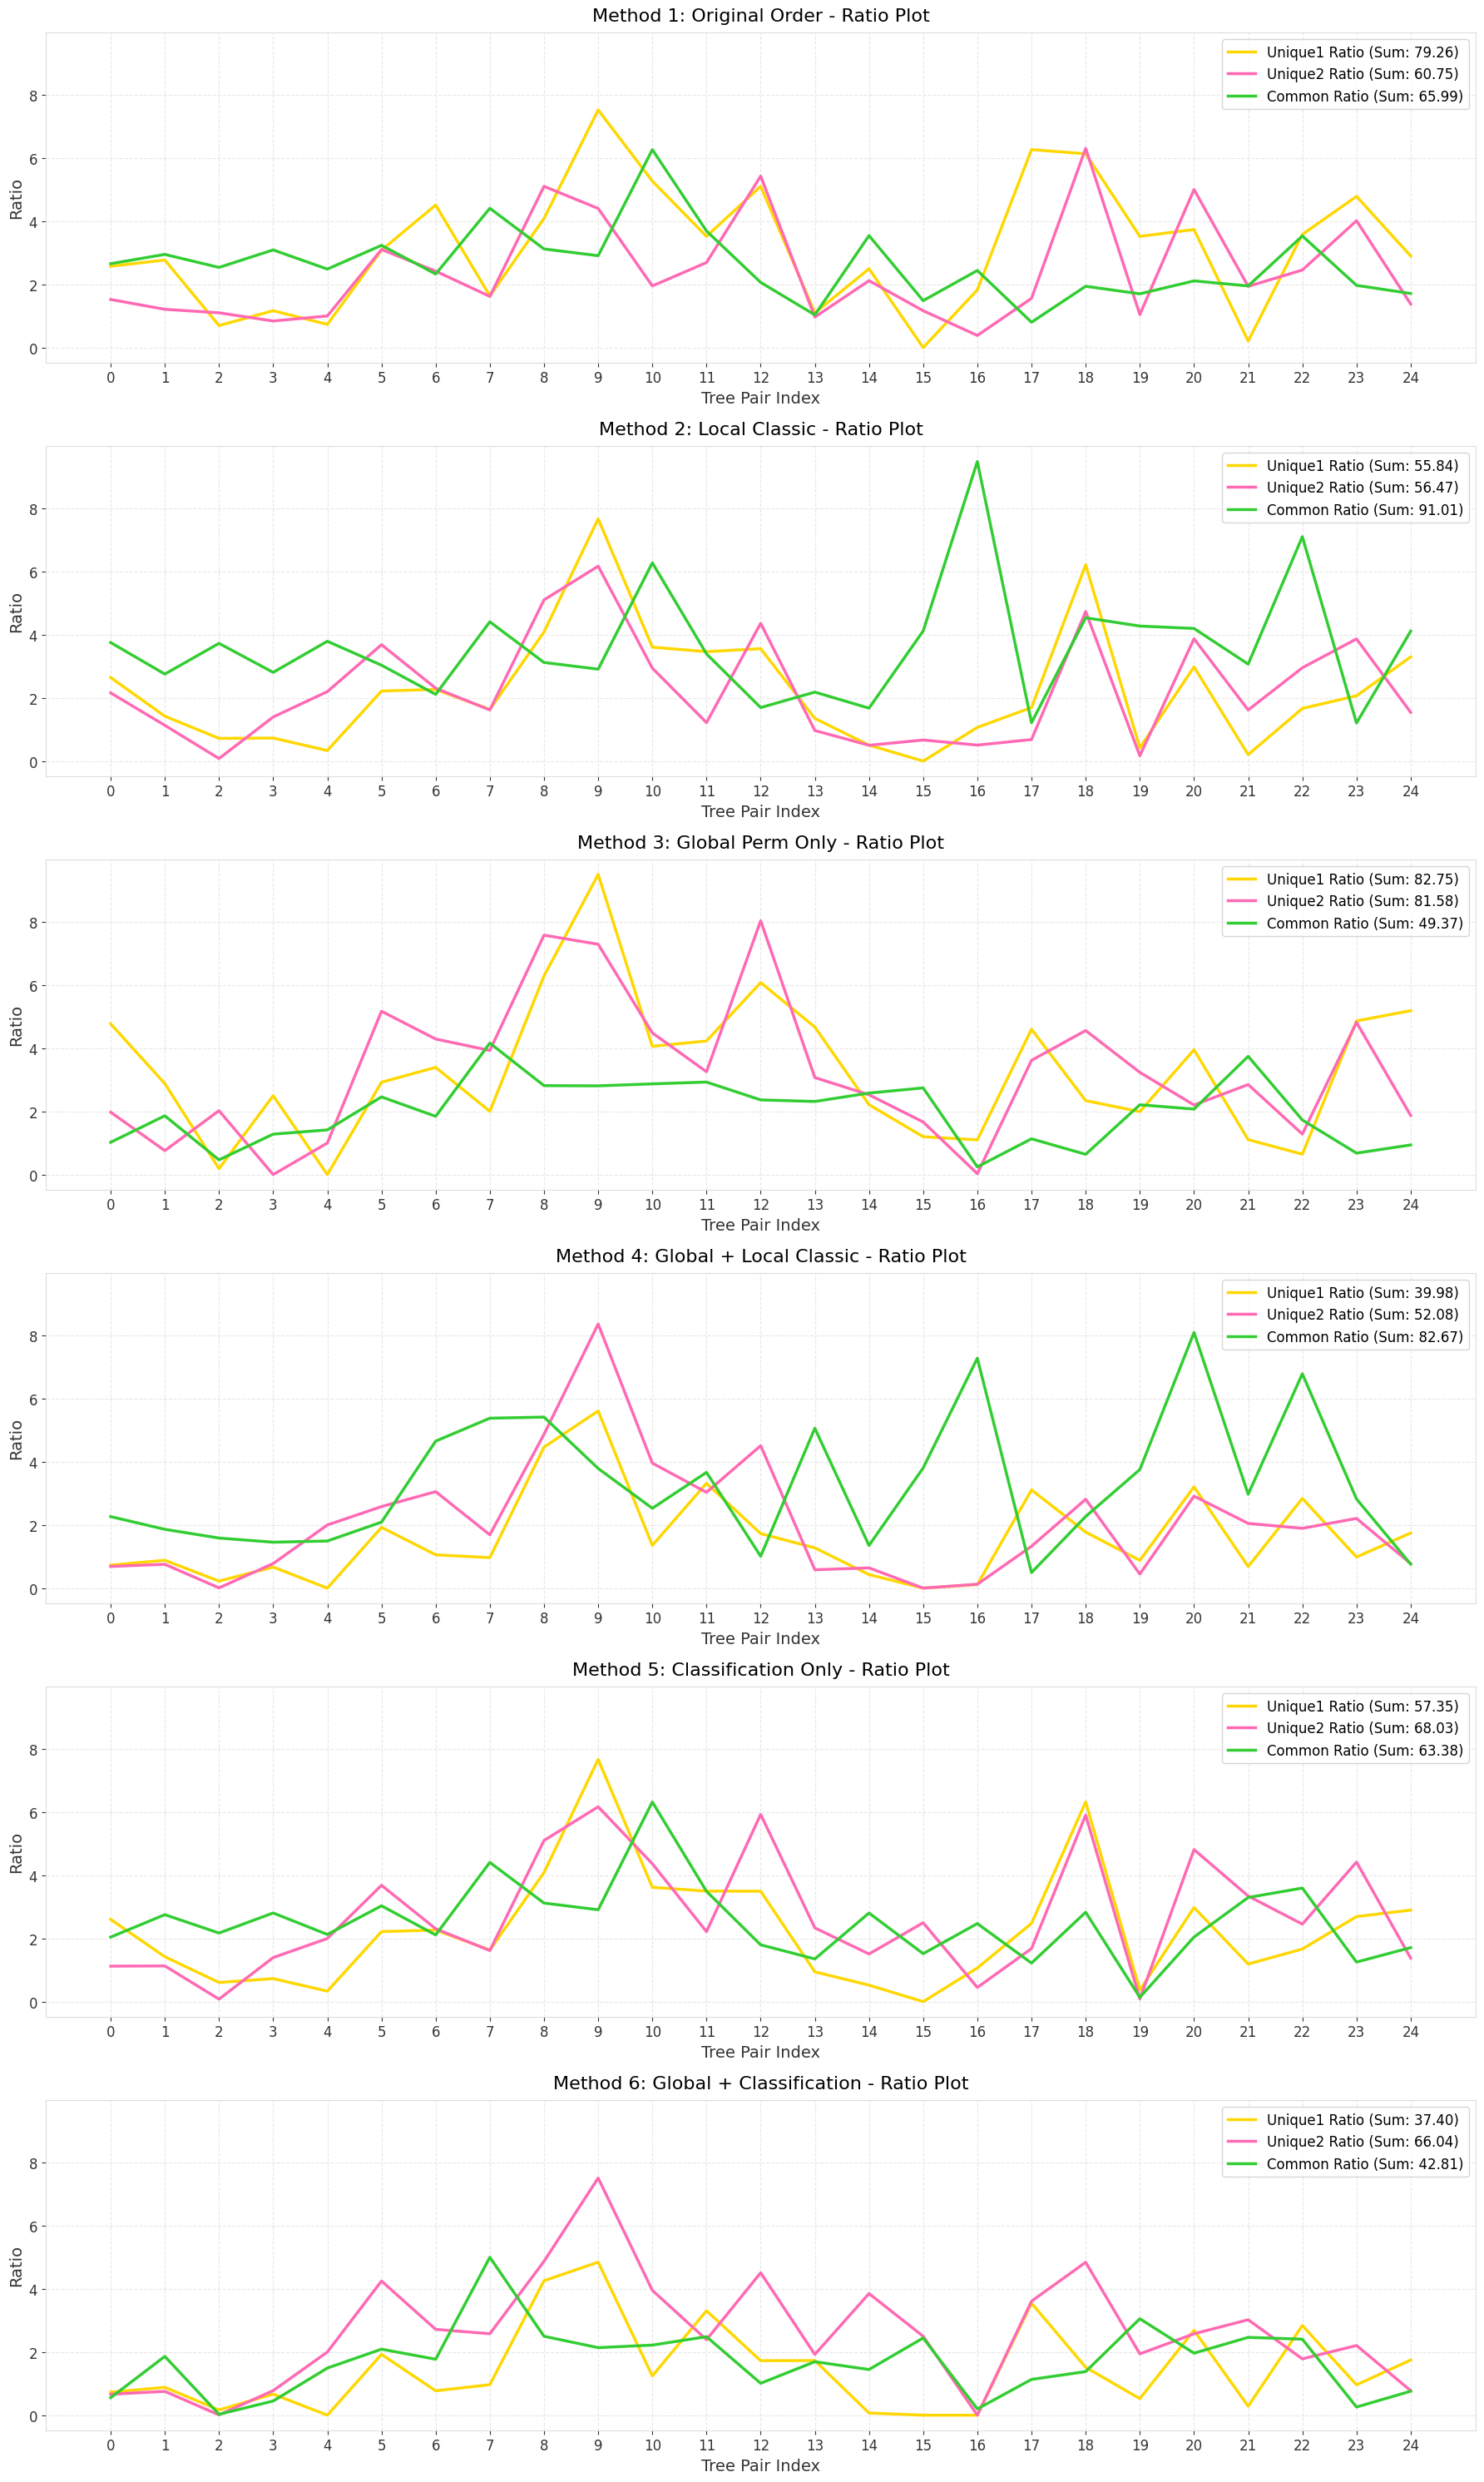

INFO:root:Profiling completed successfully.



Profile Summary:
Total time: 56.57s
Number of unique functions: 24

Top 5 time-consuming functions:
                        Function  Total Time (s)     Time %     Calls
9   reverse_lookup (split.py:85)       14.440227  25.526210  10457120
10        traverse (tree.py:204)        5.338841   9.437551   7841008
8       get_leaves (tree.py:275)        4.918576   8.694642    210991
19            add (split.py:157)        2.221880   3.927651   5120275
16       <genexpr> (split.py:61)        2.156003   3.811200  11827040


,Function,Module,Line,Name,Calls,Total Time (s),Time/Call (ms),Cumulative (s),Time %,Callers
22,classify_subtrees_using_set_ops (tree_order_op...,tree_order_optimisation_local.py,18,classify_subtrees_using_set_ops,3390,0.652855,0.192583,19.792514,1.154062,1
0,cast (typing.py:2182),typing.py,2182,cast,14386552,0.667939,0.000046,0.667939,1.180726,27
7,isdisjoint (<frozen _collections_abc>:625),<frozen _collections_abc>,625,isdisjoint,291540,0.694227,0.002381,2.512173,1.227196,3
23,collect_subtree_splits (tree_order_optimisatio...,tree_order_optimisation_local.py,34,collect_subtree_splits,3390,0.705597,0.208141,9.027425,1.247295,3
13,__hash__ (tree.py:107),tree.py,107,__hash__,585655,0.734640,0.001254,9.031067,1.298634,5
20,<method 'encode' of 'ImagingEncoder' objects> ...,~,0,<method 'encode' of 'ImagingEncoder' objects>,25,0.868690,34.747588,0.868690,1.535596,1
2,<method 'extend' of 'list' objects> (~:0),~,0,<method 'extend' of 'list' objects>,9240957,0.881860,0.000095,0.881861,1.558878,19
3,<method 'items' of 'dict' objects> (~:0),~,0,<method 'items' of 'dict' objects>,11818225,0.930054,0.000079,0.930054,1.644070,48
15,__contains__ (split.py:148),split.py,148,__contains__,6141089,1.029133,0.000168,2.171656,1.819215,6
4,<method 'add' of 'set' objects> (~:0),~,0,<method 'add' of 'set' objects>,5120350,1.055038,0.000206,2.227372,1.865006,7


In [22]:
%load_ext autoreload
%autoreload 2

profile_and_visualize(
    "./../data/output_norovirus_window_size_200_20/best_trees.newick",
    optimize_both_sides=False,
    backward=True,
    iterations=20,
    midpoint_rooted=False
)

In [ ]:
profile_and_visualize(
    "./../data/trimmed_sequences_window_1000_250_GTR/best_trees.newick",
    optimize_both_sides=False,
    backward=True,
    iterations=20,
    midpoint_rooted=False
)

INFO:root:Starting profiling...
ERROR:root:An error occurred during profiling: 'tuple' object has no attribute 'copy'


AttributeError: 'tuple' object has no attribute 'copy'

INFO:root:Starting profiling...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


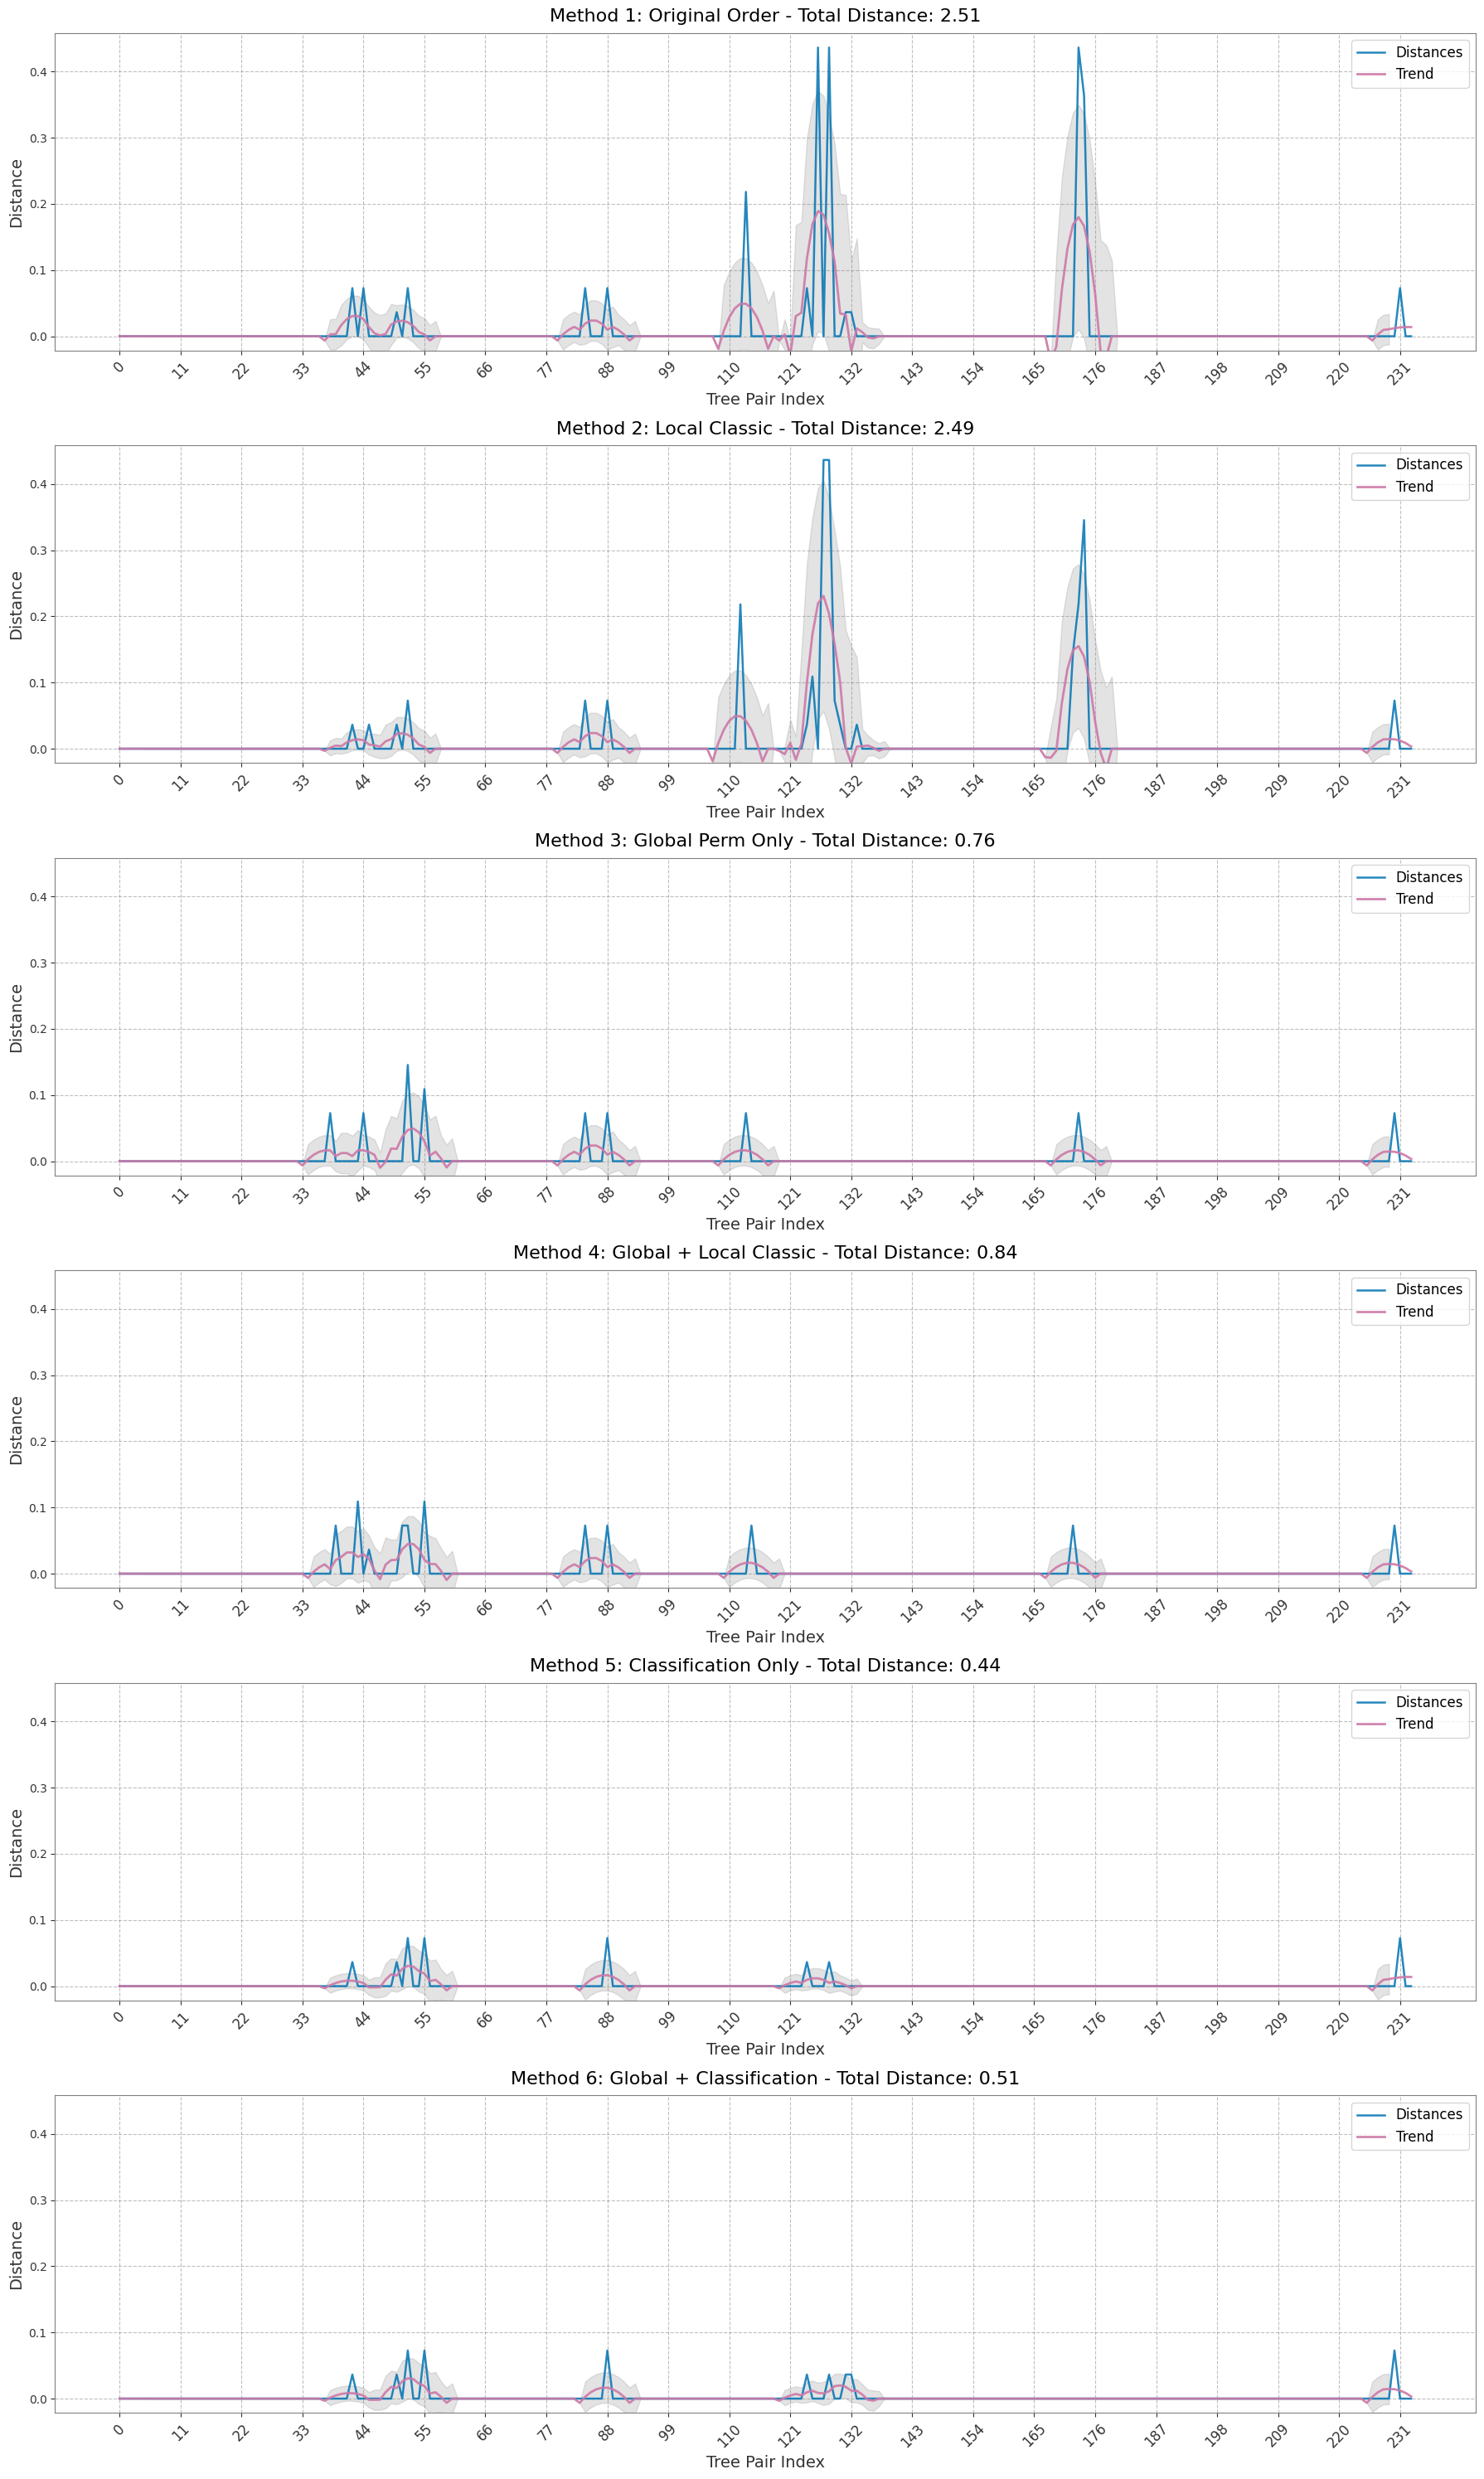

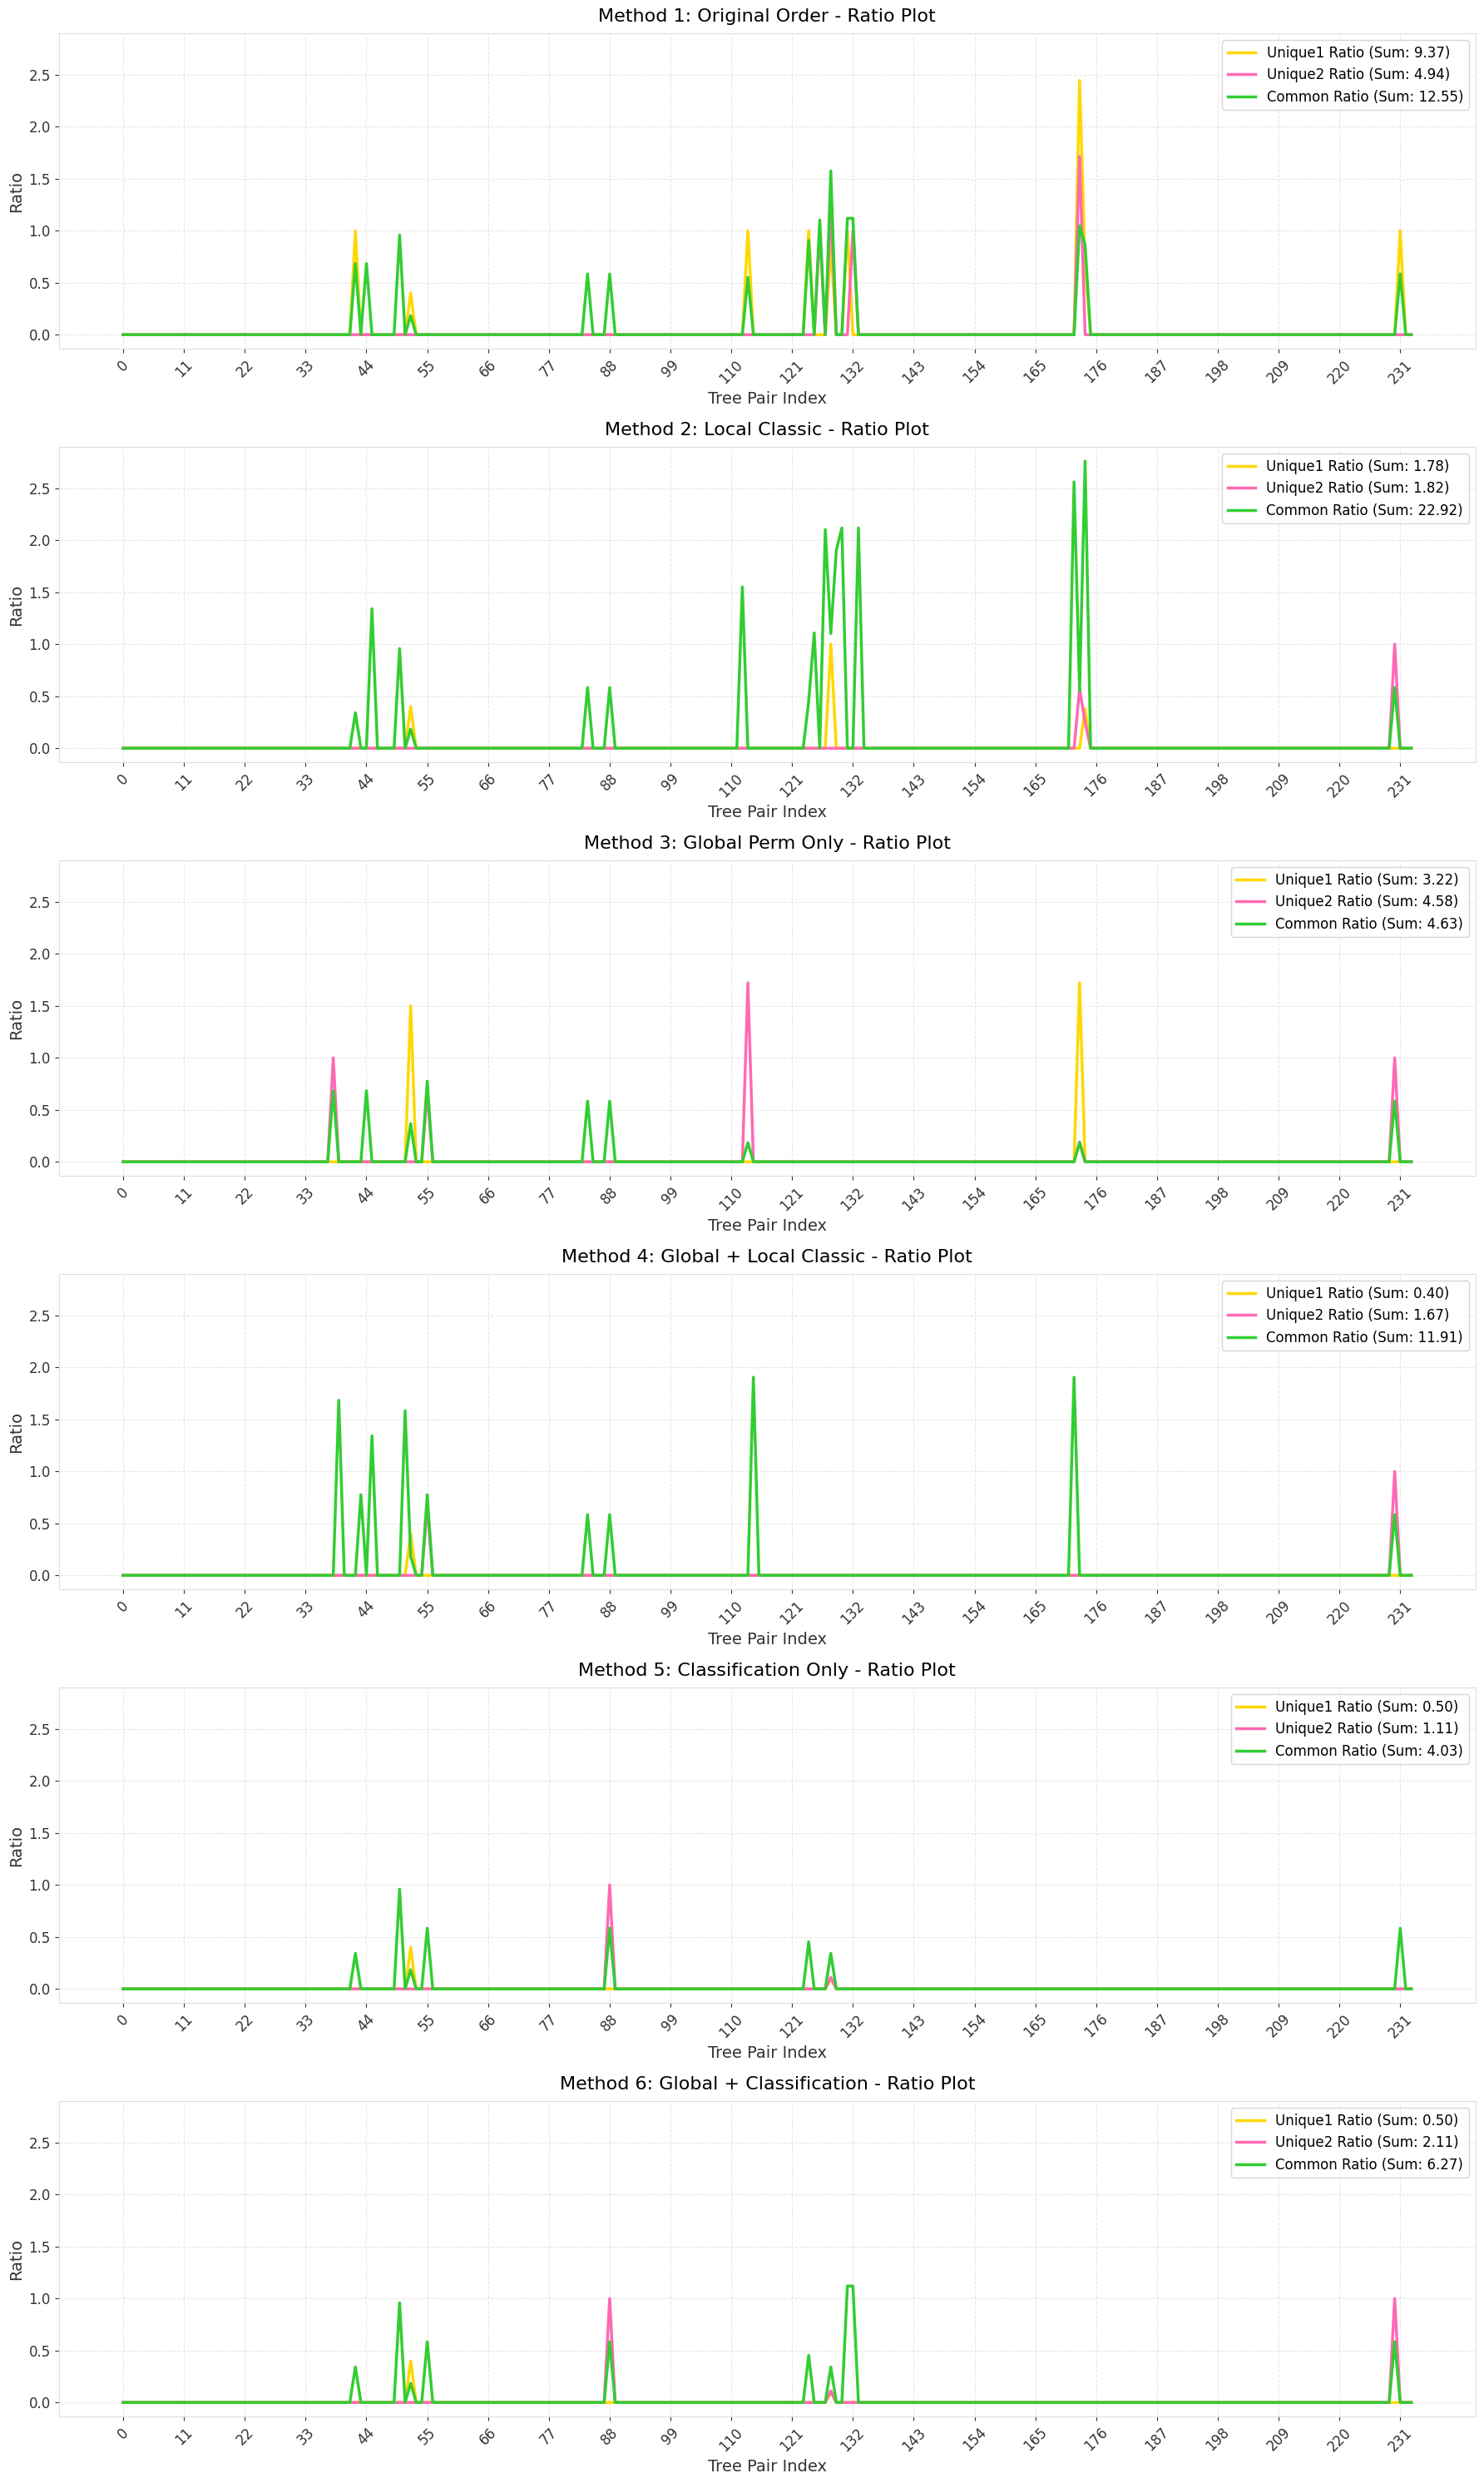

INFO:root:Profiling completed successfully.



Profile Summary:
Total time: 24.09s
Number of unique functions: 26

Top 5 time-consuming functions:
                    Function  Total Time (s)     Time %    Calls
9     traverse (tree.py:204)        2.712463  11.259800  6176016
8   get_leaves (tree.py:275)        2.271148   9.427842   374314
19        add (split.py:157)        1.542303   6.402309  3494400
18   __init__ (split.py:122)        1.344582   5.581541  1175403
16    __hash__ (split.py:82)        1.151554   4.780257  9408511


,Function,Module,Line,Name,Calls,Total Time (s),Time/Call (ms),Cumulative (s),Time %,Callers
5,<built-in method builtins.any> (~:0),~,0,<built-in method builtins.any>,695136,0.259380,0.000373,1.615762,1.076722,12
14,<genexpr> (tree.py:291),tree.py,291,<genexpr>,2075002,0.259587,0.000125,0.259618,1.077583,2
22,classify_subtrees_using_set_ops (tree_order_op...,tree_order_optimisation_local.py,18,classify_subtrees_using_set_ops,11844,0.273507,0.023092,7.498031,1.135365,1
10,union (split.py:187),split.py,187,union,74880,0.277703,0.003709,1.393284,1.152782,1
15,get_current_order (tree.py:287),tree.py,287,get_current_order,184915,0.280671,0.001518,3.255604,1.165105,9
3,<method 'get' of 'dict' objects> (~:0),~,0,<method 'get' of 'dict' objects>,992200,0.287313,0.000290,0.675011,1.192675,28
25,collect_subtree_splits (tree_order_optimisatio...,tree_order_optimisation_local.py,34,collect_subtree_splits,11844,0.310919,0.026251,3.567298,1.290668,2
23,get_splits_info (tree_order_optimisation_local...,tree_order_optimisation_local.py,68,get_splits_info,74880,0.371614,0.004963,8.715493,1.542618,2
2,<method 'extend' of 'list' objects> (~:0),~,0,<method 'extend' of 'list' objects>,3989060,0.376001,0.000094,0.376001,1.560829,10
0,cast (typing.py:2182),typing.py,2182,cast,7719220,0.383668,0.000050,0.383668,1.592657,22


In [23]:
%load_ext autoreload
%autoreload 2

profile_and_visualize(
    "./../data/alltrees_treees_cutted/alltrees.trees_cutted.newick",
    optimize_both_sides=False,
    backward=True,
    iterations=20,
    midpoint_rooted=False
)